<a href="https://www.kaggle.com/code/fareselmenshawii/svm-from-scratch?scriptVersionId=121742926" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div class="table-of-contents" style="background-color:#000000; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1 style="color:#17E8C4;">TOC</h1>
  <ol>
    <li><a href="#1" style="color: #17E8C4;">1. Import</a></li>
      <li><a href="#2" style="color: #17E8C4;">2. Data Analysis</a></li>
    <li><a href="#3" style="color: #17E8C4;">3. Data Preprocessing</a></li>
    <li><a href="#4" style="color: #17E8C4;">4. Model Implementation</a></li>
    <li><a href="#5" style="color: #17E8C4;">5. Sklearn Implementation</a></li>
     <li><a href="#6" style="color: #17E8C4;">6. Thank You</a></li> 
  </ol>
</div>

<a id="1"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #17E8C4;'>Imports</center></h1>


In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

<a id="2"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #17E8C4;'>Data Analysis</center></h1>

# Data Analysis

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


In [4]:
px.histogram(data_frame=df,x='area_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [5]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [6]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [7]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [8]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [9]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


In [10]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


In [11]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


<a id="3"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #17E8C4;'>Data Preprocessing</center></h1>

# Data Preprocessing

In [12]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
                 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.drop('id', axis=1, inplace=True) #drop redundant columns

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744



## Encode target

In [15]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

## Get highly correlated features

In [16]:
corr = df.corr()

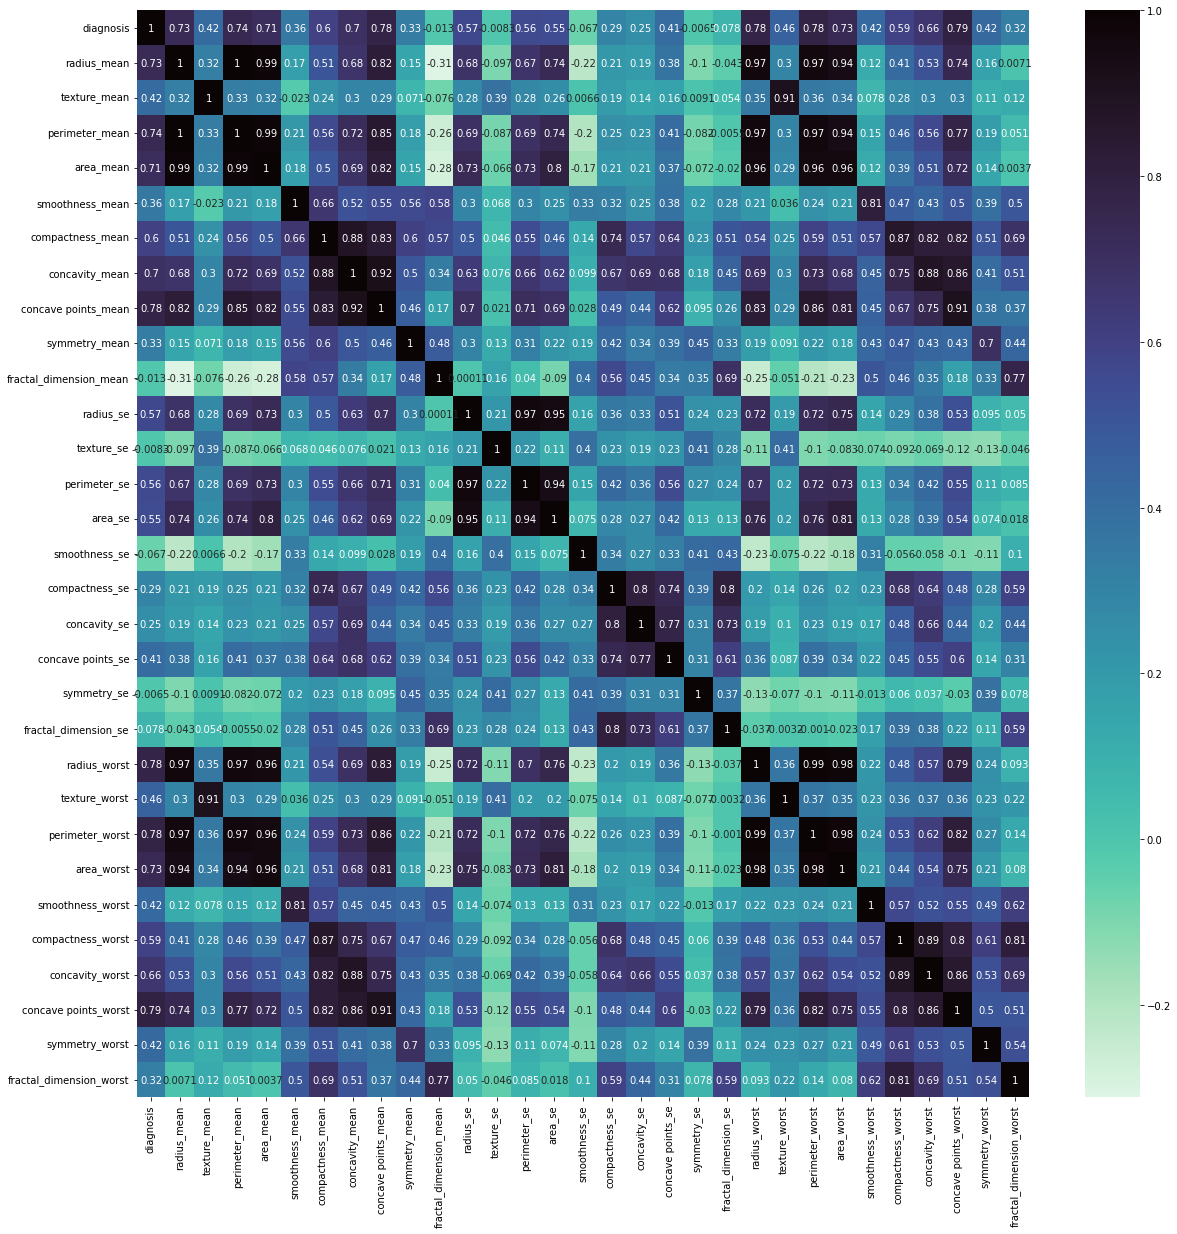

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [18]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('diagnosis')

# Display the results
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


## Assign data and labels

In [19]:
X = df[names].values
y = df['diagnosis']

## Scale the data

In [20]:
def scale(X):
    """
    Standardizes the data in the array X.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).

    Returns:
        numpy.ndarray: The standardized features array.
    """
    # Calculate the mean and standard deviation of each feature
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # Standardize the data
    X = (X - mean) / std
    return X


In [21]:
X = scale(X)

## Split into train and Testing 

In [22]:
def train_test_split(X, y, random_state=41, test_size=0.2):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).
        y (numpy.ndarray): Target array of shape (n_samples,).
        random_state (int): Seed for the random number generator. Default is 42.
        test_size (float): Proportion of samples to include in the test set. Default is 0.2.

    Returns:
        Tuple[numpy.ndarray]: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Get number of samples
    n_samples = X.shape[0]

    # Set the seed for the random number generator
    np.random.seed(random_state)

    # Shuffle the indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Determine the size of the test set
    test_size = int(n_samples * test_size)

    # Split the indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Split the features and target arrays into test and train
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the  data into traing and validating


<a id="4"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #17E8C4;'>Model Implementation</center></h1>

# Model Implementation

# How the algorithm works

**Our goal is to find a hyperplane that separates the data into 2 categories (Binary Classification)**

## Key Points:

### Hyperplane
**A hyperplane is a subspace whose dimensions is less than of it's ambient space for example in n-dimensional subspace the hyperplane will be (n-1)-dimensional**

**For SVMS the goal of this hyperplane has to Maximize margin between the two classes**

**Hyperplane equation is :**
 
**$$wx - b = 0 \ge 1, at y = 1$$**
**$$wx - b = 0 \le 1, at y = -1,$$**

**In general**

**$$y(wx - b) = 0 \ge 1$$**


**So what's a margin?**


### Margin

**Margin is the distance between the hyperplane and the data-points closest to it (support vectors)**


## Gradients Equation
For $y_i(wx_i-b)\geq 1$:

$$\frac{\partial J}{\partial w} = 2\lambda w$$

$$\frac{\partial J}{\partial b} = 0$$

For $y_i(wx_i-b)< 1$:

$$\frac{\partial J}{\partial w} = 2\lambda w - y_ix_i$$

$$\frac{\partial J}{\partial b} = -y_i$$

where $J$ is the cost function of SVM, $\lambda$ is the regularization parameter, $w$ is the weight vector, $b$ is the bias term, $x_i$ is the $i$-th data point, and $y_i$ is the corresponding label.

In [24]:
class SVM:
    """
    A Support Vector Machine (SVM) implementation using gradient descent.

    Parameters:
    -----------
    iterations : int, default=1000
        The number of iterations for gradient descent.
    lr : float, default=0.01
        The learning rate for gradient descent.
    lambdaa : float, default=0.01
        The regularization parameter.

    Attributes:
    -----------
    lambdaa : float
        The regularization parameter.
    iterations : int
        The number of iterations for gradient descent.
    lr : float
        The learning rate for gradient descent.
    w : numpy array
        The weights.
    b : float
        The bias.

    Methods:
    --------
    initialize_parameters(X)
        Initializes the weights and bias.
    gradient_descent(X, y)
        Updates the weights and bias using gradient descent.
    update_parameters(dw, db)
        Updates the weights and bias.
    fit(X, y)
        Fits the SVM to the data.
    predict(X)
        Predicts the labels for the given data.

    """

    def __init__(self, iterations=1000, lr=0.01, lambdaa=0.01):
        """
        Initializes the SVM model.

        Parameters:
        -----------
        iterations : int, default=1000
            The number of iterations for gradient descent.
        lr : float, default=0.01
            The learning rate for gradient descent.
        lambdaa : float, default=0.01
            The regularization parameter.
        """
        self.lambdaa = lambdaa
        self.iterations = iterations
        self.lr = lr
        self.w = None
        self.b = None

    def initialize_parameters(self, X):
        """
        Initializes the weights and bias.

        Parameters:
        -----------
        X : numpy array
            The input data.
        """
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

    def gradient_descent(self, X, y):
        """
        Updates the weights and bias using gradient descent.

        Parameters:
        -----------
        X : numpy array
            The input data.
        y : numpy array
            The target values.
        """
        y_ = np.where(y <= 0, -1, 1)
        for i, x in enumerate(X):
            if y_[i] * (np.dot(x, self.w) - self.b) >= 1:
                dw = 2 * self.lambdaa * self.w
                db = 0
            else:
                dw = 2 * self.lambdaa * self.w - np.dot(x, y_[i])
                db = y_[i]
            self.update_parameters(dw, db)

    def update_parameters(self, dw, db):
        """
        Updates the weights and bias.

        Parameters:
        -----------
        dw : numpy array
            The change in weights.
        db : float
            The change in bias.
        """
        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db

    def fit(self, X, y):
        """
        Fits the SVM to the data.

        Parameters:
        -----------
        X : numpy array
            The input data.
        y : numpy array
            The target values.
        """
        self.initialize_parameters(X)
        for i in range(self.iterations):
            self.gradient_descent(X, y)


    def predict(self, X):
        """
        Predicts the class labels for the test data.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input data.

        Returns
        -------
        y_pred : array-like, shape (n_samples,)
            The predicted class labels.

        """
        # get the outputs
        output = np.dot(X, self.w) - self.b
        # get the signs of the labels depending on if it's greater/less than zero
        label_signs = np.sign(output)
        #set predictions to 0 if they are less than or equal to -1 else set them to 1
        predictions = np.where(label_signs <= -1, 0, 1)
        return predictions

In [25]:
def accuracy(y_true, y_pred):
    """
    Computes the accuracy of a classification model.

    Parameters:
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns:
    ----------
        float: The accuracy of the model
    """
#     y_true = y_true.flatten()
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples) 

In [26]:
model = SVM()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

accuracy(y_test, predictions)

0.9823008849557522

<a id="5"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #17E8C4;'>Sklearn Implementation</center></h1>
    
# Sklearn Implementation


In [27]:
from sklearn.svm import SVC
skmodel = SVC()
skmodel.fit(X_train, y_train)
sk_predictions = skmodel.predict(X_test)

accuracy(y_test, sk_predictions)

0.9734513274336283

<a id="6"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #17E8C4;'>Thank You</center></h1>

# Thank You

**Thank you for going through this notebook**

**If you have any suggestions please let me know**

<div style="padding:10px; 
            color:#333333;
            margin:10px;
            font-size:150%;
            display:fill;
            border-radius:1px;
            border-style:solid;
            border-color:#666666;
            background-color:#F9F9F9;
            overflow:hidden;">
    <center>
        <a id='top'></a>
        <b>Machine Learning From Scratch Series</b>
    </center>
    <br>
    <ul>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/linear-regression-from-scratch" style="color:#0072B2">1 - Linear Regression</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/logistic-regression-from-scratch" style="color:#0072B2">2 -  Logistic Regression</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/kmeans-from-scratch" style="color:#0072B2">3 - KMeans</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/decision-tree-classifier-from-scratch" style="color:#0072B2">4 - Decision Trees</a>
        </li> 
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/random-forest-classifier-from-scratch" style="color:#0072B2">5 -  Random Forest</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/knn-from-scratch" style="color:#0072B2">6 - KNearestNeighbor</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/pca-from-scratch?scriptVersionId=121402593" style="color:#0072B2">7 - PCA</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/svm-from-scratch" style="color:#0072B2">8 - SVM</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/naive-bayes-from-scratch" style="color:#0072B2">9 - Naive Baye</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/optimized-neural-network-from-scratch" style="color:#0072B2">10 - Optimized Neural Network</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/neural-network-from-scratch" style="color:#0072B2">11 - Neural Network</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/cnn-from-scratch" style="color:#0072B2">12 - CNN</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/rnn-from-scratch" style="color:#0072B2">13 - RNN</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/lstm-from-scratch" style="color:#0072B2">14 - LSTM</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/gru-from-scratch" style="color:#0072B2">15 - GRU</a>
        </li>
    </ul>
</div>